<a href="https://colab.research.google.com/github/NehaKoppikar/BTDSS6DL/blob/master/Theory/L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RECAP: WHY DO WE NEED ML?

1. When we don't know how to program something because you don't know how it works
2. When there might be a large number of rules that change easily
3. But when we have a large number of cases where we know the outputs
4. Recognizing patterns - recognizing absence of patterns (i.e. anamolies)
5. Predicting the future

Visual Pattern recognition - Textbook case for applying ML
- Visual patterns intuitive to recognize 
- Extremely hard to define
- Huge collection of internet users generate lots of labelled data

Magic of ML
- Relatively few lines of code + Tons of Data + Tons of Compute = Solution to this hard problem

Think of yourself as an online clothes marketplace.
Hundreds of vendors joining your website
Millions of customers
You need some automatic way of recommending the products to the right customers
Neither the vendor or the customer are going to fill lengthy forms!
You need to automate this process


Fashion-MNIST is a dataset of Zalando's article images

In [0]:
#Load the dataset from Keras
from keras.datasets import fashion_mnist
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

Consists of 
a training set of 60,000 examples 
a test set of 10,000 examples. 

Each example is a 28x28 grayscale image, associated with a label from 10 classes. 


In [0]:
#Check the number of training and test examples
print("Training Samples:", len(trainX))
print("Test Samples:", len(testX))

#Assign Labels
labels=dict( {
"0": "T-shirt/top",
"1": "Trouser",
"2": "Pullover",
"3": "Dress",
"4": "Coat",
"5": "Sandal",
"6": "Shirt",
"7": "Sneaker",
"8": "Bag",
"9": "Ankle boot"
})

#Takes in an index and print the corresponding label
def label(index):
    return labels[str(index)]

Training Samples: 60000
Test Samples: 10000


Visualize a scaled up version of the data to gain intuition

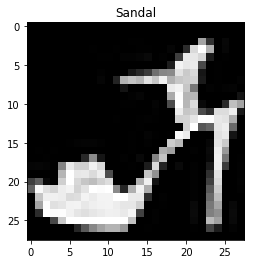

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

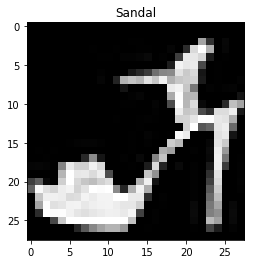

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
import pylab as pl
from IPython import display

num_images_to_viz=10
for i in range(num_images_to_viz):

    plt.imshow(trainX[i],cmap='gray')
    plt.title(label(trainY[i]))

    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(3.0)    

print(trainX[0])

Visualize the data at the original scale

In [0]:
import matplotlib.pyplot as plt
import numpy as np

dpi = 28
margin = 0.05 # (5% of the width/height of the figure...)
xpixels, ypixels = 28, 28

# Make a figure big enough to accomodate an axis of xpixels by ypixels
# as well as the ticklabels, etc...
figsize = (1 + margin) * ypixels / dpi, (1 + margin) * xpixels / dpi

for i in range(num_images_to_viz):
    fig = plt.figure(figsize=figsize, dpi=dpi)
    print(label(trainY[i]))   
            
    # Make the axis the right size...
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

    ax.imshow(trainX[i],cmap='gray', interpolation='none')
    #fig.suptitle(label(trainY[i]),fontsize=16,pad=10)
    plt.show()

    display.display(pl.gcf())
    time.sleep(3.0)
    display.clear_output(wait=True)

<Figure size 432x288 with 0 Axes>

# Perceptrons : Intuitive Way in which we make decisions

For every yes / no decision
We have certain factors that we consider
We assign a certain importance to those factors
Finally if the weighted importance is greater than some imaginary threshold, we go ahead with the decision

Life comes down to 
1. Identifying the important factors [unsupervised learning]
2. Learning how to weigh them [supervised learning]
3. Fine-tuning an intuitive threshold [supervised learning]

Eg: Should I take up the job offer?
Factors: 
    1. Does it pay well?
    2. Do I have to commute long?
    3. Do I have to work long hours?
    4. Char log kuch kahenge?

Weights:
    1. Pay: 10
    2. Commute: -12
    3. Long Hours: -2
    4. Char log: 5

Threshold: 2

Decision: Yes / No

In the context of perceptrons, 
1. one can ask only yes / no questions [i.e. features]
2. one can get only yes / no answers [i.e. decisions]
3. Weights and biases can be any real number

Although simplistic - a very powerful model

One can create universal NAND gate. 

Essentially express *anything* that can be computed as a network of perceptrons.

Note: The ability to express a computable function is not the same as the ability to learn it from data! *Nowhere close*


# Learning from mistakes #

 - The most reliable way in which humans learn
 - This is the same way in which we have devised machine learning algorithms to learn
 - Essentially take lots of training examples and make a lots of mistakes
 - With each mistake, take a small step (learning rate) towards the correct solution
 - Can you now see, why these algorithms require lots of compute?



# Problem with Perceptrons #

1. They take binary input, produce binary ouput.
Eg: Isn't it more intuitive to ask

Should I take up the job offer?
Factors: 
    1. *How much* does it pay well?
    2. *How much* do I have to commute?
    3. *How many* hours do I have to work>
    4. Char log *kya* kahenge?

Weights:
    1. Pay: 10
    2. Commute: -12
    3. Work Hours: -2
    4. Char log: 5

Threshold: 2

Decision: Maybe


2. A small change in input may cause the ouput to flip from 0 to 1
3. We *want* an algorithm that learns slowly - that doesn't jump to conclusions based upon the current training example.

# Sigmoid Neurons #

Sigmoid Function: 
\begin{align}
\sigma(x) &= \frac{1}{1+e^{-x}} \\
\end{align}

Derivative of the sigmoid function: 
\begin{align}
\dfrac{d}{dx} \sigma(x) &= \dfrac{d}{dx} \left[ \dfrac{1}{1 + e^{-x}} \right] \\
&= \dfrac{d}{dx} \left( 1 + \mathrm{e}^{-x} \right)^{-1} \\
&= -(1 + e^{-x})^{-2}(-e^{-x}) \\
&= \dfrac{e^{-x}}{\left(1 + e^{-x}\right)^2} \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \dfrac{e^{-x}}{1 + e^{-x}}  \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \dfrac{(1 + e^{-x}) - 1}{1 + e^{-x}}  \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \left( \dfrac{1 + e^{-x}}{1 + e^{-x}} - \dfrac{1}{1 + e^{-x}} \right) \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \left( 1 - \dfrac{1}{1 + e^{-x}} \right) \\
&= \sigma(x) \cdot (1 - \sigma(x))
\end{align}



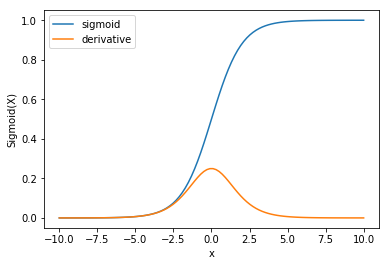

In [0]:
# Import matplotlib, numpy and math 
import matplotlib.pyplot as plt 
import numpy as np 
import math 

def sigmoid(x):
    return 1/(1 + np.exp(-x)) 

x = np.linspace(-10, 10, 100) 
y = sigmoid(x)*(1-sigmoid(x))
z = sigmoid(x)

  
plt.plot(x, z, label="sigmoid") 
plt.plot(x, y, label="derivative") 
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 
plt.legend()

#Note that both the sigmoid and its derivate vanish at the extremes
#This fact will be extremely important later on when we encounter vanishing gradients
#Neural networks stop learning due to this very reason
#This is also why other activation functions like selu, relu, leaky relu, etc. have been invented

plt.show() 

# Neural Network Design #

We want
1. Some way of feeding in the input [28 x 28 pixels]
2. Some way of checking the output [class label]
3. Some way of quantifying the mistake made by the neural network.
4. Some way of steering the network so that it may make fewer mistakes.


First we consider just the initialization of weights and biases

In [0]:
# Req 1: First we concentrate on feeding the input

# Convert the 2D input to 1D
def convert_to_1D(X):
    return [ x.ravel()/256.0 for x in X ]
    #Is the normalization needed?

trainX_1D=convert_to_1D(trainX)
testX_1D=convert_to_1D(testX)

# Q1. Why is this conversion needed?
# Q2. What if I were to find a way one random order. Then shuffle all the examples (both train + test) using this order?
# Q3. What if I were to uses a random sequence for each training example?




In [0]:
#Req 2: Now we convert each target output from a single valued label to a 1D array

#Takes in a 1D array of targets and returns a 2D one-hot encoding
def convert_to_one_hot_encoding(target_Y):
    Target_Y=np.zeros((len(target_Y),len(labels)),dtype=np.float64)
    for i in range(len(target_Y)):
        Target_Y[i][target_Y[i]]=1
    return Target_Y

#Q1. Why is this needed?
#Q2. Again, what if I were to randomize here?

In [0]:
#Req 3: Quantify the mistake made by the neural network

#Returns the mean squared error
def mse(output_Y,target_Y):
    assert len(output_Y)==len(target_Y)
    #convert the target Y to 2D matrix
    Target_Y=convert_to_one_hot_encoding(target_Y)
    diff=np.subtract(Target_Y, output_Y)
    mse=np.mean(diff**2,axis=0)
    return 0.5*mse

#Q1. Why this particular function?
#Q2. What if we use just the difference between the output and the target?
#Q3. What if we use error cube instead of error square? 


# Gradient Descent #
Req 4: Some way of steering the network towards the correct ouput

$y$ = $x_{1}^2$ + $x_{2}^2$ 

$y^\prime$ = $(x_{1}+\Delta x_{1})^2$ + $(x_{2}+\Delta x_{2})^2$ 

$y^\prime$ = $x_{1}^2$ + 2*$x_{1}$ * $\Delta x_{1}$   + $\Delta x_{1}^2$ +    $x_{2}^2$ + 2*$x_{2}$ * $\Delta x_{2}$   + $\Delta x_{2}^2$  

$y^\prime$ - $y$ =  2*$x_{1}$ * $\Delta x_{1}$   + $\Delta x_{1}^2$ +  2*$x_{2}$ * $\Delta x_{2}$   + $\Delta x_{2}^2$

Now if $\Delta x_1$ and $\Delta x_2$ are small, say 0.0001; $\Delta x_1^{2}$ and $\Delta x_2^{2}$ become even smaller 0.00000001. They can be ignored (for now). [We will encounter techniques where we can't ignore this]


$y^\prime$ - $y$  = $ \Delta y$ =  2*$x_{1}$ * $\Delta x_{1}$ +  2*$x_{2}$ * $\Delta x_{2}$  

$\frac {\partial y}{\partial x_{1}}$ =  2 * $x_{1}$

$\frac {\partial y}{\partial x_{2}}$ =  2 * $x_{2}$

$ \Delta y$ = [ 2*$x_{1}$  2*$x_{2}$] . [ $\Delta x_{1}$ $\Delta x_{2}$]

If y was the cost function, then we would want y to always decrease 
Thus we would want $ \Delta y$  to *always* be negative

The question is how do we change $x_{1}$ (i.e. $\Delta x_{1}$) and $x_{2}$ (i.e. $\Delta x_{2}$) such that this *always* happens?

What is $ \Delta y$ if $\Delta x_{1}$ = -2*$x_{1}$ and $\Delta x_{2}$ = -2*$x_{2}$ ?

$ \Delta y$ = -2*$x_{1}$ * 2* *$x_{1}$ + -2*$x_{2}$ * 2* *$x_{2}$

$ \Delta y$ = -4*$x_{1}^{2}$ -4* *$x_{2}$

$ \Delta y$ = -4*($x_{1}^{2}$ + $x_{2}^{2}$) = -4 * positive term = negative term

Thus by changing the variables in the direction of the gradient, we end up always decreasing the cost.

Hence the name *Gradient Descent*


In [0]:
def f(x,y):
    return x**2 + y**2


def df_dx(x,y):
    return 2*x 


def df_dy(x,y):
    return 2*y

x,y=-100,100
delta_x,delta_y=1000,1000

epsilon=0.005

lr=.1

itr_to_convergence=0
while(abs(delta_x) > epsilon or abs(delta_y) > epsilon):
    delta_x = -1*lr* df_dx(x,y)
    delta_y = -1*lr* df_dy(x,y)
    x = x - lr* df_dx(x,y)
    y = y - lr* df_dy(x,y)
    itr_to_convergence += 1
    print(x,y,f(x,y))
    
print("Iterations to convergence:", itr_to_convergence)

#Q1. How does one know that one has converged? f(x) stops growing?
#Q2. How does one tune the learning rate?
#Q3. What happens if the learning rate is too low? 
#Q4. What happens if the learning rate is too high? 
#Q4. Is there a relationship between learning rate and epsilon?

-80.0 80.0 12800.0
-64.0 64.0 8192.0
-51.2 51.2 5242.880000000001
-40.96 40.96 3355.4432
-32.768 32.768 2147.483648
-26.2144 26.2144 1374.38953472
-20.97152 20.97152 879.6093022208001
-16.777216000000003 16.777216000000003 562.9499534213122
-13.421772800000003 13.421772800000003 360.28797018963985
-10.737418240000002 10.737418240000002 230.58430092136948
-8.589934592000002 8.589934592000002 147.57395258967648
-6.871947673600002 6.871947673600002 94.44732965739296
-5.497558138880001 5.497558138880001 60.44629098073149
-4.398046511104001 4.398046511104001 38.685626227668145
-3.5184372088832006 3.5184372088832006 24.758800785707614
-2.8147497671065604 2.8147497671065604 15.845632502852872
-2.251799813685248 2.251799813685248 10.141204801825836
-1.8014398509481986 1.8014398509481986 6.490371073168536
-1.4411518807585588 1.4411518807585588 4.153837486827863
-1.152921504606847 1.152921504606847 2.658455991569832
-0.9223372036854777 0.9223372036854777 1.7014118346046927
-0.7378697629483821 0.

Thus if we can somehow successfully update all the weights and the biases of our neural network in the negative direction of the gradient vector, we will end up reducing the misclassification cost.

** How do we change the weights and biases of the neural network? **

For each change in each weight and each bias, we want to ensure that the total cost of misclassification across *all* the training examples is minimized.

Mathematically we write this as,
C(w,b) = $\frac {1}{2n} \sum_{x} (pred - y)^{2} $

If x (i.e. the number of data points) in the training data set is very large, then computing this cost becomes very expensive.

Hence we sample a small set of data points, compute the cost for these data points and consider this average to be equal to the total average


In [0]:
import random
array = random.sample(range(1,10000),1000)

#Exact mean
print("Exact Mean:", np.mean(array))
for mini_batch_size in 10, 50, 100, 500, 1000:
    temp_array = random.sample( array, mini_batch_size)
    print("Mini Batch Size:", mini_batch_size," Mean:", np.mean(temp_array), "Diff from true mean: ", abs(np.mean(array)-np.mean(temp_array)))
    
print("------") 
#over 1000 runs
for mini_batch_size in 10, 50, 100, 500, 1000:
    diff=[]
    for trial in range(100):
        temp_array = random.sample( array, mini_batch_size)
        diff.append( abs(np.mean(array)-np.mean(temp_array)) )
    print("Mini Batch Size:", mini_batch_size," Avg Diff from true mean: ", np.mean(diff))
    

#Stochastic Gradient Descent Way
#Epoch is one complete pass through the entire dataset
#Note that this is different from sampling (without replacement)
print("------") 
num_epochs=100
for mini_batch_size in 10, 50, 100, 500, 1000:
    diff=[]
    for epoch in range(num_epochs):
        random.shuffle(array)
        for mb in range(0,len(array),mini_batch_size):
           mini_batch_mean=np.mean( array[mb:mb+mini_batch_size] )
           diff.append( abs(np.mean(array)-mini_batch_mean)) 
    print("Mini Batch Size:", mini_batch_size," Avg Diff from true mean: ", np.mean(diff))

#Q1. What is the difference of increasing the number of epochs
#Q2. How is epoch related to the mini_batch_size

Exact Mean: 4993.369
Mini Batch Size: 10  Mean: 4062.3 Diff from true mean:  931.0689999999995
Mini Batch Size: 50  Mean: 5399.2 Diff from true mean:  405.83100000000013
Mini Batch Size: 100  Mean: 5152.34 Diff from true mean:  158.97100000000046
Mini Batch Size: 500  Mean: 5032.972 Diff from true mean:  39.603000000000065
Mini Batch Size: 1000  Mean: 4993.369 Diff from true mean:  0.0
------
Mini Batch Size: 10  Avg Diff from true mean:  824.1137200000003
Mini Batch Size: 50  Avg Diff from true mean:  318.90022
Mini Batch Size: 100  Avg Diff from true mean:  228.36948
Mini Batch Size: 500  Avg Diff from true mean:  75.44414000000002
Mini Batch Size: 1000  Avg Diff from true mean:  0.0
------
Mini Batch Size: 10  Avg Diff from true mean:  740.4062074
Mini Batch Size: 50  Avg Diff from true mean:  326.930789
Mini Batch Size: 100  Avg Diff from true mean:  228.929428
Mini Batch Size: 500  Avg Diff from true mean:  71.39303999999998
Mini Batch Size: 1000  Avg Diff from true mean:  0.0


In [0]:
#assumes Y1 is an array of probabilities
#assumes Y2 is just the index
def compute_classification_accuracy(Y1,Y2):
    assert len(Y1) == len(Y2)
    match=np.zeros(len(Y1))
    for i in range(len(Y1)):
        if np.argmax(Y1[i]) == Y2[i]:
            match[i]=1
    #print("Classification Accuracy:",sum(match)," / ",len(match))
    return sum(match)/len(match)
        

In [0]:
from random import sample

class NN(object):
    def __init__(self, num_neurons_each_layer):
        self.num_layers = len(num_neurons_each_layer)
        self.neurons = num_neurons_each_layer
        self.biases = []
        for i in range(self.num_layers):
            #By convention: 0th layer is input layer. It has no bias
            if i==0:
                self.biases.append([])
                continue
            else:
                #initialize the baises to random normal distribution mean=0 std=1
                self.biases.append(np.random.randn( self.neurons[i] ))
                
        self.weights=[]
        for i in range(self.num_layers):
            #By convention: 0th layer is input layer. It has no bias
            if i==0:
                self.weights.append([])
                continue
            else:
                #weights connecting layer i-1 to layer i
                #initialize the weights to random normal distribution mean=0 std=1
                self.weights.append(np.random.normal(0, 1, (self.neurons[i-1], self.neurons[i])))
        
    
    def feedforward(self, a):
        for i in range(1,self.num_layers):
            a=np.matmul(a,self.weights[i])+self.biases[i]
            a=sigmoid(a)
            #print(a)
        return a
    
    def SGD(self, training_data, epochs=1, mini_batch_size=16, lr=3,test_data=None):
        #For each epoch
        for epoch in range(epochs):
            #Randomly shuffle the training data
            random.shuffle(training_data)
            #Go through the training data one minibatch at a time
            for j in range(0,len(training_data),mini_batch_size):
                data = training_data[j:j+mini_batch_size]
                outY=feedforward(data)
            
            #For the data find out the average training error
            

In [0]:
#test out the accuracy of random initialization over 1000 trials
trials=1
acc=np.zeros(trials)
for trial in range(trials):
    n=NN([784,30,10])
    outY=n.feedforward(trainX_1D)
    acc[trial]=compute_classification_accuracy(outY,trainY)
    print(mse(outY,trainY))
print("Avg Train Acc:",np.mean(acc), "Std Train Acc:", np.std(acc))

[[-0.02267259 -0.9543439  -0.99779469 ... -0.56590041 -0.97181877
   0.01034487]
 [ 0.98632836 -0.9012304  -0.877951   ... -0.92342693 -0.99642137
  -0.98722188]
 [ 0.96113385 -0.95293868 -0.99864923 ... -0.57867242 -0.98527423
  -0.98780494]
 ...
 [-0.02753381 -0.97989879 -0.99850325 ... -0.8390182  -0.99174283
  -0.99287756]
 [ 0.99914594 -0.93334709 -0.99431449 ... -0.98588418 -0.98755514
  -0.98430501]
 [-0.00831667 -0.70055646 -0.99932844 ... -0.65552666 -0.98963497
  -0.99957051]]
[[5.14046273e-04 9.10772278e-01 9.95594244e-01 ... 3.20243279e-01
  9.44431715e-01 1.07016343e-04]
 [9.72843644e-01 8.12216239e-01 7.70797951e-01 ... 8.52717293e-01
  9.92855549e-01 9.74607038e-01]
 [9.23778276e-01 9.08092126e-01 9.97300286e-01 ... 3.34861769e-01
  9.70765316e-01 9.75758607e-01]
 ...
 [7.58110900e-04 9.60201643e-01 9.97008750e-01 ... 7.03951534e-01
  9.83553849e-01 9.85805850e-01]
 [9.98292616e-01 8.71136791e-01 9.88661299e-01 ... 9.71967621e-01
  9.75265154e-01 9.68856359e-01]
 [6.9167